In [1]:
! pip install seaborn
! pip install imblearn
! pip install xgboost

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)


In [2]:
import mlflow
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,f1_score , recall_score,precision_score,PrecisionRecallDisplay,ConfusionMatrixDisplay,RocCurveDisplay


In [3]:
data = pd.read_csv("D:\DEPI\Final Project\data\PS_20174392719_1491204439457_log.csv")
data

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\George A. Fareed\AppData\Local\Temp\ipykernel_18332\419275635.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("D:\DEPI\Final Project\data\PS_20174392719_1491204439457_log.csv")


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
label_encoder = preprocessing.LabelEncoder()
data["type"] = label_encoder.fit_transform(data["type"])
data["nameOrig"] = label_encoder.fit_transform(data["nameOrig"])
data["nameDest"] = label_encoder.fit_transform(data["nameDest"])

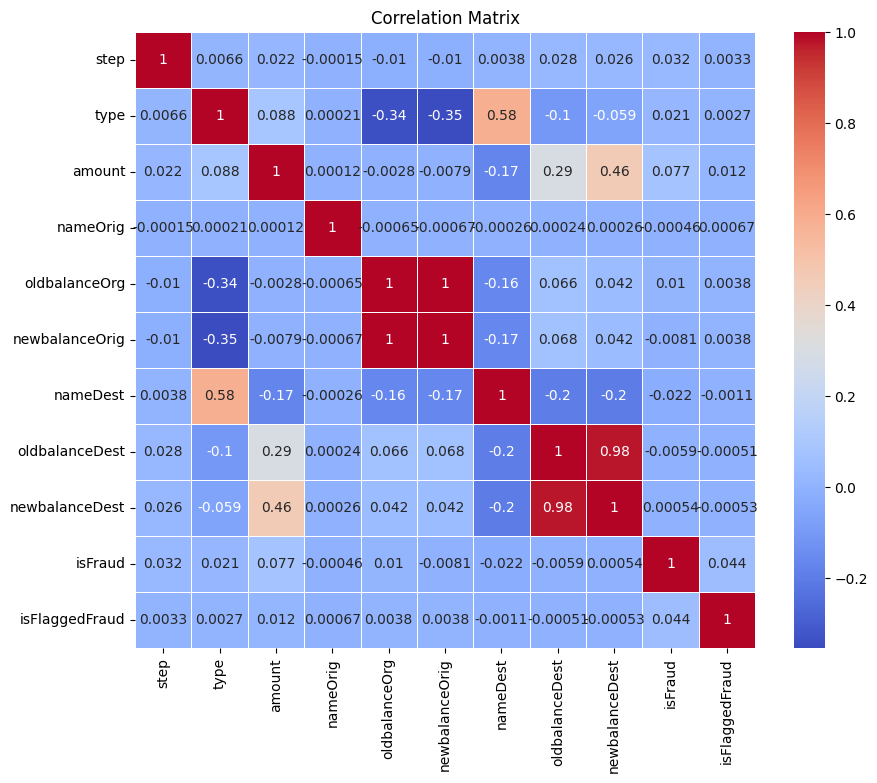

In [5]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [6]:
x = data.drop(columns=['isFraud'])
y = data['isFraud']

In [7]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [8]:
df_combined = pd.concat([x, y], axis=1)

In [9]:
df_combined

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,3,9.839640e+03,757869,1.701360e+05,160296.36,1662094,0.000000e+00,0.000000e+00,0,0
1,1,3,1.864280e+03,2188998,2.124900e+04,19384.72,1733924,0.000000e+00,0.000000e+00,0,0
2,1,4,1.810000e+02,1002156,1.810000e+02,0.00,439685,0.000000e+00,0.000000e+00,0,1
3,1,1,1.810000e+02,5828262,1.810000e+02,0.00,391696,2.118200e+04,0.000000e+00,0,1
4,1,3,1.166814e+04,3445981,4.155400e+04,29885.86,828919,0.000000e+00,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12708809,581,1,4.475173e+06,4912422,4.475173e+06,0.00,382398,3.236657e+06,7.711830e+06,0,1
12708810,281,1,3.664370e+05,206594,3.664370e+05,0.00,205165,3.223281e+06,3.589718e+06,0,1
12708811,420,4,2.964614e+06,3713802,2.964614e+06,0.00,210206,0.000000e+00,0.000000e+00,0,1
12708812,355,1,2.987525e+05,3777735,2.987525e+05,0.00,328743,1.189376e+04,3.106463e+05,0,1


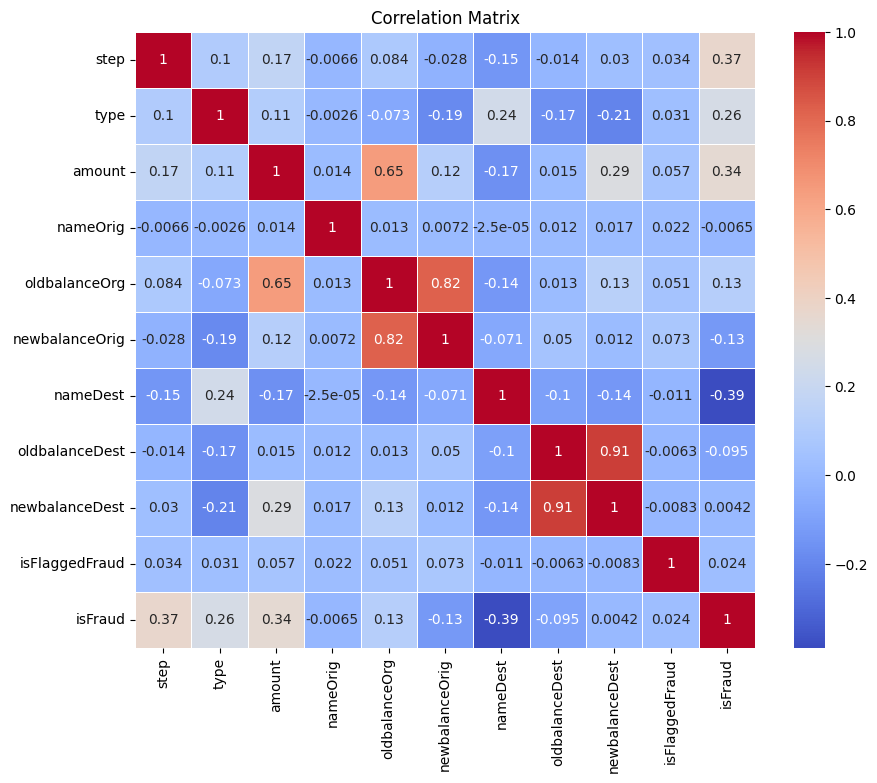

In [10]:
correlation_matrix = df_combined.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
df_combined = df_combined.drop(columns=['isFlaggedFraud'])

In [12]:
x = df_combined.drop(columns=['isFraud'])
y = df_combined['isFraud']

In [13]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
experiment_id  = mlflow.create_experiment(
        name="Fraud_detection",
        artifact_location="Fraud_detection_artifact",
        tags = {"env":"dev","version":"1.0.0"},
    )

MlflowException: Experiment 'Fraud_detection' already exists.

In [15]:
! mlflow ui 

^C


In [17]:
from mlflow.models.signature import infer_signature

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay
from mlflow.models.signature import infer_signature
import mlflow
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined

experiment = mlflow.get_experiment(experiment_id)

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Step 4: Store results
results = {}

# Step 5: Train models and calculate metrics
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name, experiment_id=experiment_id) as run:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate confusion matrix and other metrics
        cm = confusion_matrix(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Log Precision-Recall curve
        fig_pr = plt.figure()
        pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
        plt.title("Precision-Recall curve")
        mlflow.log_figure(fig_pr, "metrics/precision_recall_curve.png")

        # Log ROC curve
        fig_roc = plt.figure()
        roc_display = RocCurveDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
        plt.title("ROC curve")
        mlflow.log_figure(fig_roc, "metrics/roc_curve.png")

        # Log Confusion Matrix
        fig_cof = plt.figure()
        cof_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=plt.gca())
        plt.title("Confusion Matrix")
        mlflow.log_figure(fig_cof, "metrics/confusion_matrix.png")

        # Store and log results
        results = {
            'Accuracy': accuracy,
            'Confusion Matrix': cm.flatten(),  # Flatten to get TN, FP, FN, TP
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }

        for metric, value in results.items():
            if isinstance(value, (int, float)):
                mlflow.log_metric(metric, value)

        # Log model signature and model itself
        model_signature = infer_signature(model_input=X_train, model_output=y_pred)
        mlflow.sklearn.log_model(sk_model=model, artifact_path=model_name, signature=model_signature)

# XGBoost Model
with mlflow.start_run(run_name="XGB", experiment_id=experiment_id) as run:
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Define parameters and enable GPU usage
    params = {
        'max_depth': 20,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'tree_method': 'gpu_hist',
        'predictor': 'gpu_predictor'
    }

    # Train model
    model_XGB = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')])
    y_pred_prob = model_XGB.predict(dtest)
    y_pred_XGB = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

    cm = confusion_matrix(y_test, y_pred_XGB)
    accuracy = accuracy_score(y_test, y_pred_XGB)
    precision = precision_score(y_test, y_pred_XGB)
    recall = recall_score(y_test, y_pred_XGB)
    f1 = f1_score(y_test, y_pred_XGB)

    # Store and log results
    results = {
        'Accuracy': accuracy,
        'Confusion Matrix': cm.flatten(),
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    for metric, value in results.items():
        if isinstance(value, (int, float)):
            mlflow.log_metric(metric, value)
        

    # Log Precision-Recall curve
    fig_pr = plt.figure()
    pr_display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_XGB, ax=plt.gca())
    plt.title("Precision-Recall curve")
    mlflow.log_figure(fig_pr, "metrics/precision_recall_curve.png")

    # Log ROC curve
    fig_roc = plt.figure()
    roc_display = RocCurveDisplay.from_predictions(y_test, y_pred_XGB, ax=plt.gca())
    plt.title("ROC curve")
    mlflow.log_figure(fig_roc, "metrics/roc_curve.png")

    # Log Confusion Matrix
    fig_cof = plt.figure()
    cof_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_XGB, ax=plt.gca())
    plt.title("Confusion Matrix")
    mlflow.log_figure(fig_cof, "metrics/confusion_matrix.png")

    # Log XGBoost model and parameters
    model_signature = infer_signature(model_input=X_train, model_output=y_pred_XGB)
    mlflow.sklearn.log_model(sk_model=model_XGB, artifact_path="XGB", signature=model_signature)
    mlflow.log_params(params)


d:\DEPI\Final Project\Mlflow\.ven\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\DEPI\Final Project\Mlflow\.ven\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing valu

[0]	test-auc:0.99968
[1]	test-auc:0.99980
[2]	test-auc:0.99985
[3]	test-auc:0.99988
[4]	test-auc:0.99990
[5]	test-auc:0.99991
[6]	test-auc:0.99992
[7]	test-auc:0.99994
[8]	test-auc:0.99995
[9]	test-auc:0.99996
[10]	test-auc:0.99996
[11]	test-auc:0.99996
[12]	test-auc:0.99997
[13]	test-auc:0.99997
[14]	test-auc:0.99997
[15]	test-auc:0.99997
[16]	test-auc:0.99997
[17]	test-auc:0.99997
[18]	test-auc:0.99997
[19]	test-auc:0.99997
[20]	test-auc:0.99998
[21]	test-auc:0.99998
[22]	test-auc:0.99998
[23]	test-auc:0.99998
[24]	test-auc:0.99998
[25]	test-auc:0.99998
[26]	test-auc:0.99998
[27]	test-auc:0.99998
[28]	test-auc:0.99998
[29]	test-auc:0.99998
[30]	test-auc:0.99998
[31]	test-auc:0.99998
[32]	test-auc:0.99998
[33]	test-auc:0.99999
[34]	test-auc:0.99999
[35]	test-auc:0.99999
[36]	test-auc:0.99999
[37]	test-auc:0.99999
[38]	test-auc:0.99999
[39]	test-auc:0.99999
[40]	test-auc:0.99999
[41]	test-auc:0.99999
[42]	test-auc:0.99999
[43]	test-auc:0.99999
[44]	test-auc:0.99999
[45]	test-auc:0.9999

d:\DEPI\Final Project\Mlflow\.ven\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:59:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
d:\DEPI\Final Project\Mlflow\.ven\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64)

In [ ]:
results

In [ ]:
# Step 6: Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).transpose()

# Step 7: Display results
results_df.index.name = 'Model'
results_df.columns = ['Accuracy','Confusion Matrix (TN, FP, FN, TP)', 'Precision', 'Recall', 'F1 Score']
results_df